# Movie Recommender (TF-IDF)

$$dfidf(t,d) = tf(t,d) \cdot idf(t)$$

* Term ferecuency (tf): counts of t in d (this is what we get with the CountVectorizer)


* Document frequency (idf): $idf(t) = log \frac{N}{N(t)}$

    N: number of documents; N(t) Number of documents containing t
    
    
In this project we use TF to build a movie recommender

### Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

### Import & Explore Data

In [4]:
df = pd.read_csv('tmdb_5000_movies.csv')

In [5]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


## Tokenization

In [6]:
#convert relevant data for each movie into a single string
# to be ingested by TfidfVectorizer
def genres_and_keywords_to_string(row):
    genres = json.loads(row['genres'])
    genres = ' '.join(''.join(item['name'].split())for item in genres)
    
    keywords = json.loads(row['keywords'])
    keywords = ' '.join(''.join(item['name'].split())for item in keywords)
    return '%s %s' % (genres, keywords)

In [7]:
#create a new string representation for genres & keywords
df['string'] = df.apply(genres_and_keywords_to_string, axis = 1)

In [8]:
#create a tf-idf vectorizer object
tfidf = TfidfVectorizer(max_features = 2000)
#create a data matrix from tfidf
X = tfidf.fit_transform(df['string'])

## Recommender

* we compute **cosine similarity** to for a chosen movie with the data base.

* we then order the computed **cosine similarity** and then give recommendations base on this 

In [9]:
#generate a mmapping from movie title to index
movie2index = pd.Series(df.index, index = df['title'])

In [10]:
#we chose a random movie
movie_index = np.random.randint(4802)
movie_index

4185

In [11]:
query = X[4185]

In [12]:
query.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [16]:
#compute cosine simiarity between query and every vector in X
# we flatten the array to be 1d array
cos_scores = cosine_similarity(query,X).flatten()

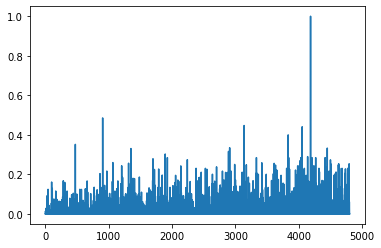

In [19]:
plt.plot(cos_scores)

In [21]:
#rank the cos_scores in descending order
(-cos_scores).argsort()

array([4185,  905, 3137, ..., 1969, 1953, 4802])

In [26]:
#give top 5 matches (excluding self)
recommended_index = (-cos_scores).argsort()[1:6]
df['title'].iloc[recommended_index]

905                          Patch Adams
3137                           Nurse 3-D
4053    Friday the 13th: A New Beginning
3832                     The Nun's Story
474                            Evolution
Name: title, dtype: object